# Estadística Descriptiva.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/cars.csv')

In [3]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

## Medidas de Tendencia Central

### Estadisticas descriptivas

In [5]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [6]:
round(df['price_usd'].mean(), 2)

6639.97

In [7]:
df['price_usd'].median()

4800.0

In [8]:
df['price_usd'].describe()

count    38531.000000
mean      6639.971021
std       6428.152018
min          1.000000
25%       2100.000000
50%       4800.000000
75%       8990.000000
max      50000.000000
Name: price_usd, dtype: float64

### Análisis gráfico

<AxesSubplot:ylabel='Frequency'>

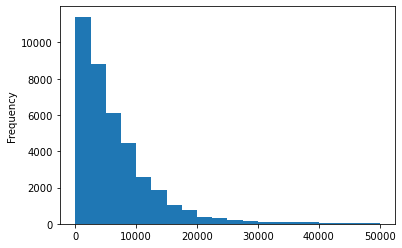

In [9]:
df['price_usd'].plot.hist(bins=20)

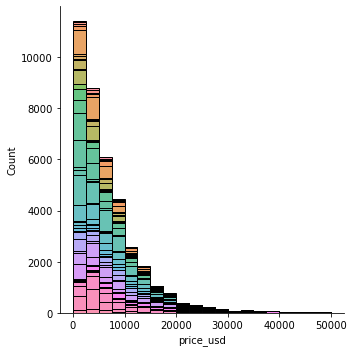

In [10]:
sns.displot(df, x='price_usd', hue='manufacturer_name', multiple='stack', legend=False, bins=20)

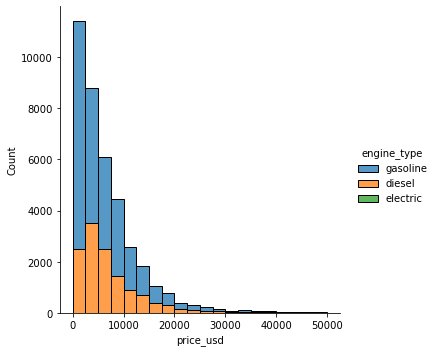

In [11]:
sns.displot(df, x='price_usd', hue='engine_type', multiple='stack', bins=20)

In [12]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


**Conociendo la distribución de una consulta concreta**

In [13]:
Q7_df = df[(df['manufacturer_name'] == 'Audi') & (df['model_name'] == 'Q7')]

In [14]:
Q7_df.sample()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
19716,Audi,Q7,automatic,black,272000,2008,diesel,False,diesel,3.0,...,True,True,True,False,True,True,False,True,True,0


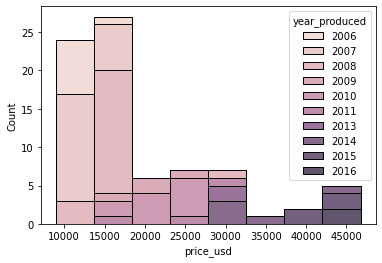

In [15]:
sns.histplot(Q7_df, x='price_usd', hue='year_produced',multiple='stack')
plt.show()

## Medidas de Dispersión

In [18]:
# Desviación estandar
round(df['price_usd'].std(),2)

6428.15

In [22]:
# Rango
rango = df['price_usd'].max() - df['price_usd'].min() 
rango

49999.0

In [33]:
# Quartiles
min_value = df['price_usd'].quantile(q=0)

Q1 = df['price_usd'].quantile(q=0.25)
Q2 = df['price_usd'].median()
Q3 = df['price_usd'].quantile(q=0.75)

max_value = df['price_usd'].quantile(q=1)

In [34]:
min_value, Q1, Q2, Q3, max_value

(1.0, 2100.0, 4800.0, 8990.0, 50000.0)

In [37]:
#Rango interquartil
iqr = Q3-Q1
iqr

6890.0

### Detección de outliers

In [40]:
minlimit = Q1 - (1.5*iqr)
maxlimit = Q3 + (1.5*iqr)

In [41]:
minlimit, maxlimit

(-8235.0, 19325.0)

### Diagrama de caja

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

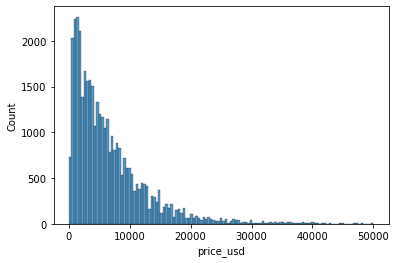

In [43]:
sns.histplot(df['price_usd'])

<AxesSubplot:>

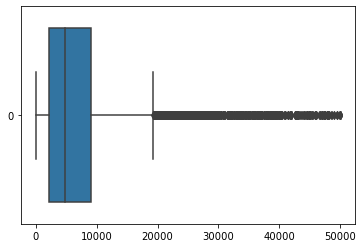

In [46]:
sns.boxplot(data = df['price_usd'], orient='horizontal')

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

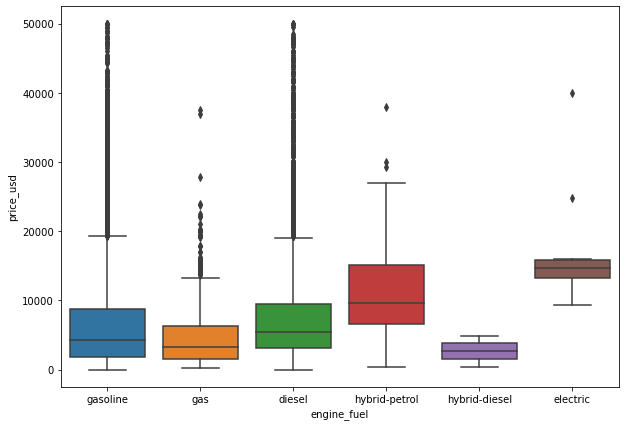

In [53]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='engine_fuel', y='price_usd')